In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt         
from sklearn.cluster import KMeans

In [3]:
rfm = pd.read_csv('clustering_Ex1.csv')

In [4]:
type(rfm)

pandas.core.frame.DataFrame

In [5]:
rfm

,cid,gender,R,F,M
0,0S3670071489,F,586,1,1380
1,0S3687895473,M,12,1,1186
2,0S3690675977,F,75,2,2850
3,2009S2044237,F,657,1,1099
4,2009S2044261,M,145,1,1360
...,...,...,...,...,...
43667,S201S242852053,F,211,1,678
43668,S201S280812053,F,109,2,3120
43669,S201S280816053,M,313,1,780
43670,S201S280840053,M,33,1,150


In [5]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cid     43672 non-null  object
 1   gender  43672 non-null  object
 2   R       43672 non-null  int64 
 3   F       43672 non-null  int64 
 4   M       43672 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.7+ MB


In [6]:
data = rfm.iloc[:, 2:5]
print(data)

         R  F     M
0      586  1  1380
1       12  1  1186
2       75  2  2850
3      657  1  1099
4      145  1  1360
...    ... ..   ...
43667  211  1   678
43668  109  2  3120
43669  313  1   780
43670   33  1   150
43671   24  2  2590

[43672 rows x 3 columns]


In [7]:
#另一種選擇欄位的方法
df = rfm[['R', 'F', 'M']]
df.head()

,R,F,M
0,586,1,1380
1,12,1,1186
2,75,2,2850
3,657,1,1099
4,145,1,1360


In [8]:
data.describe()

,R,F,M
count,43672.000000,43672.000000,43672.000000
mean,312.230560,1.788835,2595.994298
std,197.701405,2.262211,4945.038093
min,1.000000,1.000000,29.000000
25%,141.000000,1.000000,870.000000
50%,296.000000,1.000000,1380.000000
75%,484.000000,2.000000,2580.000000
max,669.000000,112.000000,233136.000000


In [8]:
#最小值最大值正規化(Min-Max Normalization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
df_minmax = scaler.fit_transform(data.to_numpy())
df_minmax

array([[8.75748503e-01, 0.00000000e+00, 5.79562175e-03],
       [1.64670659e-02, 0.00000000e+00, 4.96338591e-03],
       [1.10778443e-01, 9.00900901e-03, 1.21017387e-02],
       ...,
       [4.67065868e-01, 0.00000000e+00, 3.22169647e-03],
       [4.79041916e-02, 0.00000000e+00, 5.19074931e-04],
       [3.44311377e-02, 9.00900901e-03, 1.09863711e-02]])

In [10]:
df_minmax = pd.DataFrame(df_minmax, columns = ['R', 'F', 'M'])
df_minmax

,R,F,M
0,0.875749,0.000000,0.005796
1,0.016467,0.000000,0.004963
2,0.110778,0.009009,0.012102
3,0.982036,0.000000,0.004590
4,0.215569,0.000000,0.005710
...,...,...,...
43667,0.314371,0.000000,0.002784
43668,0.161677,0.009009,0.013260
43669,0.467066,0.000000,0.003222
43670,0.047904,0.000000,0.000519


In [11]:
model_KMC = KMeans(n_clusters = 4, max_iter = 500, random_state = 42)

In [12]:
model_KMC.fit_predict(df_minmax)

array([1, 2, 2, ..., 0, 2, 2])

In [13]:
r1 = pd.Series(model_KMC.labels_).value_counts()
r1

2    12062
0    11837
3    10187
1     9586
dtype: int64

In [14]:
r2 = pd.DataFrame(model_KMC.cluster_centers_)
r2

,0,1,2
0,0.358468,0.006232,0.010220
1,0.877883,0.001400,0.006335
2,0.105587,0.015541,0.018300
3,0.630672,0.003496,0.007696


In [15]:
r21 = pd.concat([r2, r1], axis = 1)
r21

,0,1,2,0
0,0.358468,0.006232,0.010220,11837
1,0.877883,0.001400,0.006335,9586
2,0.105587,0.015541,0.018300,12062
3,0.630672,0.003496,0.007696,10187


In [16]:
r21.columns = list(df_minmax.columns) + ['size_of_Group']
r21

,R,F,M,size_of_Group
0,0.358468,0.006232,0.010220,11837
1,0.877883,0.001400,0.006335,9586
2,0.105587,0.015541,0.018300,12062
3,0.630672,0.003496,0.007696,10187


In [17]:
r = pd.concat([df_minmax, pd.Series(model_KMC.labels_, index = df_minmax.index)], axis = 1)
r

,R,F,M,0
0,0.875749,0.000000,0.005796,1
1,0.016467,0.000000,0.004963,2
2,0.110778,0.009009,0.012102,2
3,0.982036,0.000000,0.004590,1
4,0.215569,0.000000,0.005710,2
...,...,...,...,...
43667,0.314371,0.000000,0.002784,0
43668,0.161677,0.009009,0.013260,2
43669,0.467066,0.000000,0.003222,0
43670,0.047904,0.000000,0.000519,2


In [18]:
r.columns = list(df_minmax.columns) + ['GroupID']
r

,R,F,M,GroupID
0,0.875749,0.000000,0.005796,1
1,0.016467,0.000000,0.004963,2
2,0.110778,0.009009,0.012102,2
3,0.982036,0.000000,0.004590,1
4,0.215569,0.000000,0.005710,2
...,...,...,...,...
43667,0.314371,0.000000,0.002784,0
43668,0.161677,0.009009,0.013260,2
43669,0.467066,0.000000,0.003222,0
43670,0.047904,0.000000,0.000519,2


In [19]:
rfm["k-means"] = model_KMC.labels_
rfm

,cid,gender,R,F,M,k-means
0,0S3670071489,F,586,1,1380,1
1,0S3687895473,M,12,1,1186,2
2,0S3690675977,F,75,2,2850,2
3,2009S2044237,F,657,1,1099,1
4,2009S2044261,M,145,1,1360,2
...,...,...,...,...,...,...
43667,S201S242852053,F,211,1,678,0
43668,S201S280812053,F,109,2,3120,2
43669,S201S280816053,M,313,1,780,0
43670,S201S280840053,M,33,1,150,2


In [20]:
rfm.to_csv("rfm_KMC_Output.csv",index = False)

C:\Users\USER\AppData\Local\Temp\ipykernel_13432\2652294920.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


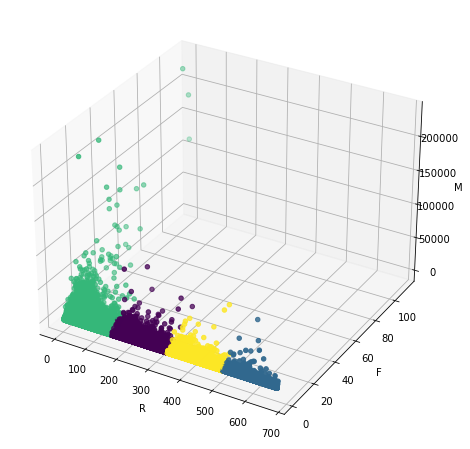

In [21]:
#3D散佈圖_精簡方法
import matplotlib.pyplot as plt
dft = pd.read_csv('rfm_KMC_Output.csv')
fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.scatter(dft['R'], dft['F'], dft['M'], c = dft['k-means'], marker = 'o')
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

plt.show()

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
SSE = [] 
for k in range(2, 11):
    est = KMeans(n_clusters = k) 
    est.fit(df_minmax)
    SSE.append(est.inertia_)

SSE 

[943.1063556920773,
 464.7779677042206,
 258.95275064471514,
 180.10469769507188,
 135.06870940285665,
 108.3394979462708,
 89.48362894011262,
 78.2245390985227,
 67.81120439679789]

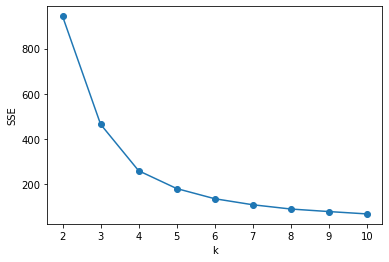

In [25]:
X = range(2, 11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')

plt.show()

In [26]:
#將每一群客戶資料抽出另外儲存
group0 = r[r['GroupID'] == 0]
group1 = r[r['GroupID'] == 1]
group2 = r[r['GroupID'] == 2]
group3 = r[r['GroupID'] == 3]

In [27]:
#每一群的基本統計量描述
group0.describe()
group1.describe()
group2.describe()
group3.describe()

,R,F,M,GroupID
count,10187.000000,10187.000000,10187.000000,10187.0
mean,0.630258,0.003491,0.007693,3.0
std,0.071988,0.009076,0.009380,0.0
min,0.495509,0.000000,0.000026,3.0
25%,0.573353,0.000000,0.003121,3.0
50%,0.627246,0.000000,0.005367,3.0
75%,0.691617,0.000000,0.008713,3.0
max,0.754491,0.252252,0.199449,3.0


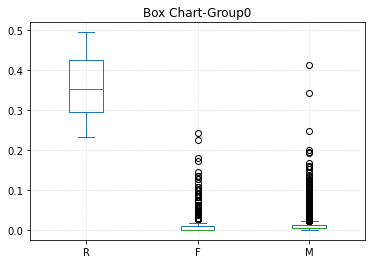

In [28]:
group0 = group0[['R', 'F', 'M']]
group0.plot.box(title = "Box Chart-Group0")
plt.grid(linestyle = "--", alpha = 0.3)

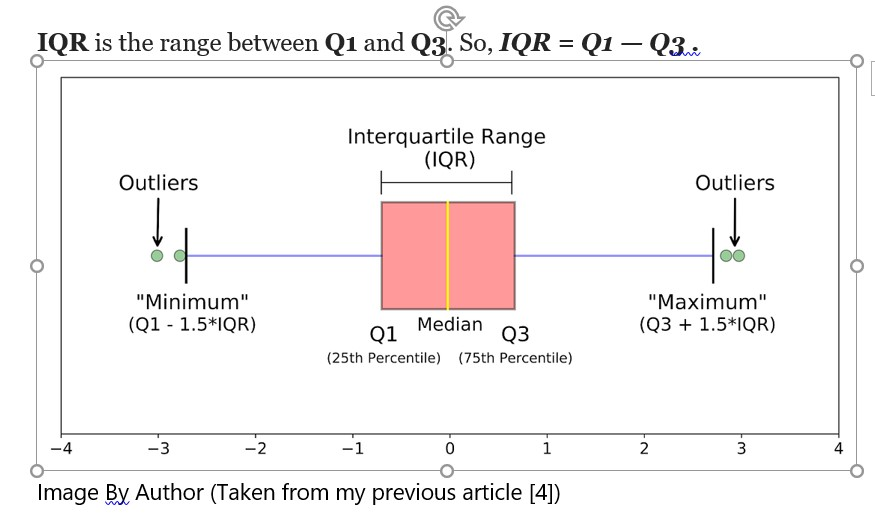

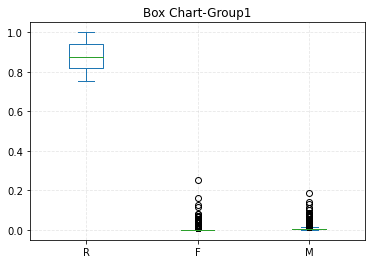

In [29]:
group1 = group1[['R', 'F', 'M']]
group1.plot.box(title = "Box Chart-Group1")
plt.grid(linestyle = "--", alpha = 0.3)

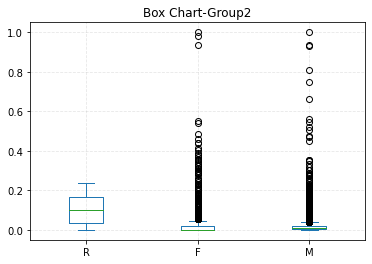

In [30]:
group2 = group2[['R', 'F', 'M']]
group2.plot.box(title = "Box Chart-Group2")
plt.grid(linestyle = "--", alpha = 0.3)

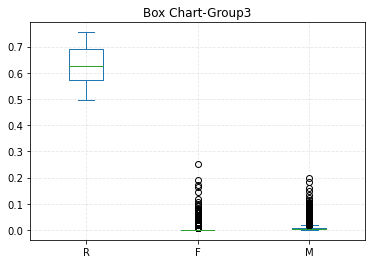

In [31]:
group3 = group3[['R', 'F', 'M']]
group3.plot.box(title = "Box Chart-Group3")
plt.grid(linestyle = "--", alpha = 0.3)

In [32]:
g0 = r[r['GroupID'] == 0]
g1 = r[r['GroupID'] == 1]
g2 = r[r['GroupID'] == 2]
g3 = r[r['GroupID'] == 3]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


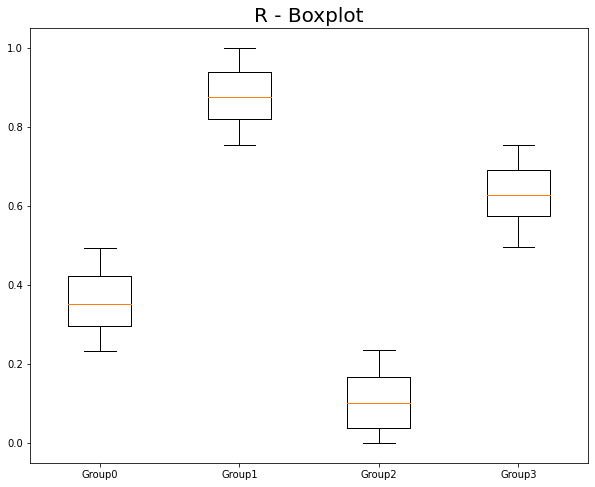

In [51]:
plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['R'], g1['R'], g2['R'], g3['R']], labels = labels)
plt.title('R - Boxplot', fontsize = 20)

plt.show()

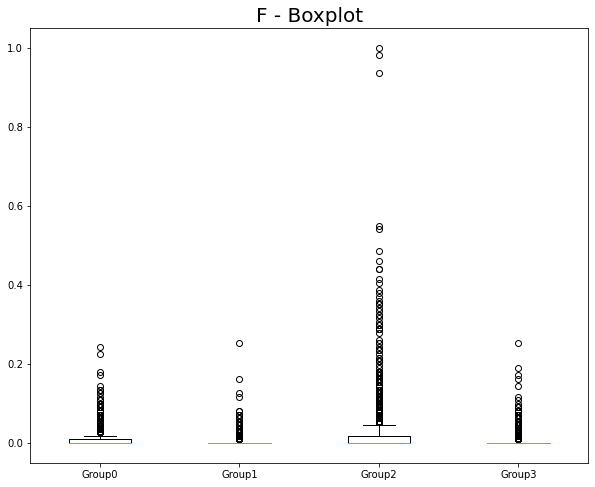

In [33]:
plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['F'], g1['F'], g2['F'], g3['F']], labels = labels)
plt.title('F - Boxplot', fontsize = 20)

plt.show()

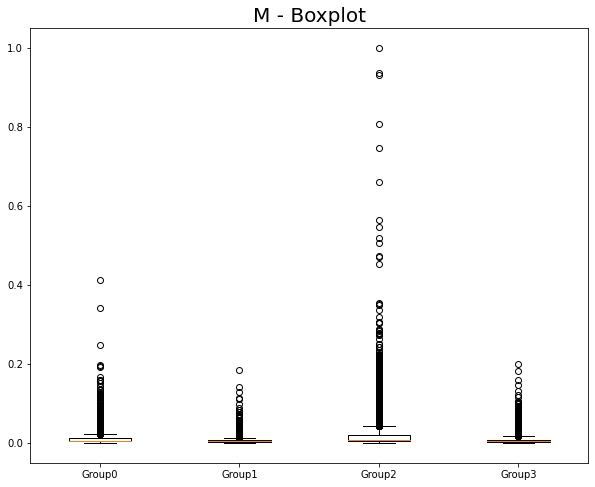

In [34]:
plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['M'], g1['M'], g2['M'], g3['M']], labels = labels)
plt.title('M - Boxplot', fontsize = 20)

plt.show()